In [1]:
import pandas as pd
filepath = 'https://raw.githubusercontent.com/selva86/datasets/master/Raotbl6.csv'
df_comp = pd.read_csv(filepath, parse_dates=['date'], index_col='date')
print(df_comp.shape)  # (123, 8)
df_comp.tail()

(123, 8)


,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfce
date,,,,,,,,
1988-07-01,4042.7,3971.9,179.6,131.5,124.9,106.2,123.5,92.8
1988-10-01,4069.4,3995.8,181.3,133.3,126.2,107.3,124.9,92.9
1989-01-01,4106.8,4019.9,184.1,134.8,127.7,109.5,126.6,94.0
1989-04-01,4132.5,4044.1,186.1,134.8,129.3,111.1,129.0,100.6
1989-07-01,4162.9,4068.4,187.4,137.2,130.2,109.8,129.9,98.2


In [2]:
dat=df_comp['gdfim']
dat.head()

date
1959-01-01    26.9
1959-04-01    27.0
1959-07-01    27.1
1959-10-01    27.1
1960-01-01    27.2
Name: gdfim, dtype: float64

In [3]:
import statsmodels.tsa.stattools as sts
result = sts.adfuller(dat)
print('p-value: %f' % result[1])

p-value: 0.938674


In [4]:
dat_transformed=dat.diff().dropna()
dat_transformed.tail()

date
1988-07-01    0.1
1988-10-01    1.1
1989-01-01    2.2
1989-04-01    1.6
1989-07-01   -1.3
Name: gdfim, dtype: float64

In [5]:
result = sts.adfuller(dat_transformed)
print('p-value: %f' % result[1])

p-value: 0.000554


In [6]:
!pip install pmdarima
from pmdarima.arima import auto_arima


In [7]:
model_auto = auto_arima(dat_transformed,d=0)

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [8]:
model_auto

ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [16]:
pred=model_auto.predict(n_periods = 10)
df_auto_pred = pd.DataFrame(pred)

In [18]:
df_forecast= dat.iloc[-1] + df_auto_pred.cumsum()

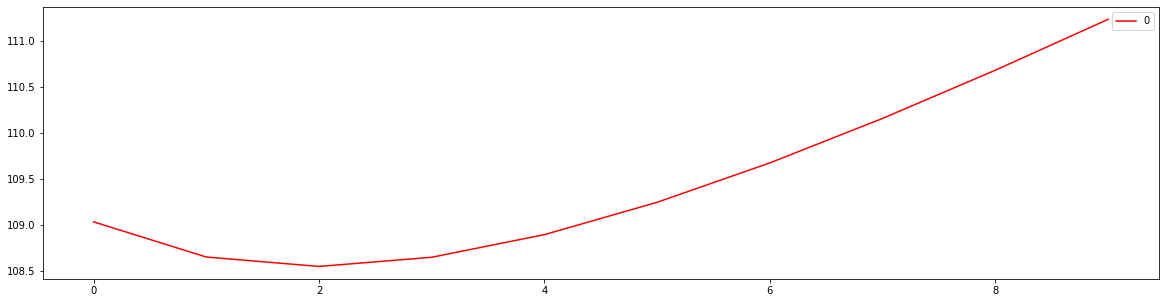

In [19]:
df_forecast.plot(figsize = (20,5), color = "red")

In [20]:
dates=pd.date_range(start="1989-10-01",freq='QS',periods=10)
dates

DatetimeIndex(['1989-10-01', '1990-01-01', '1990-04-01', '1990-07-01',
               '1990-10-01', '1991-01-01', '1991-04-01', '1991-07-01',
               '1991-10-01', '1992-01-01'],
              dtype='datetime64[ns]', freq='QS-JAN')

In [21]:
df_forecast.index=dates
df_forecast.columns=['Predictions']
df_forecast.head()

,Predictions
1989-10-01,109.033172
1990-01-01,108.651989
1990-04-01,108.549744
1990-07-01,108.649255
1990-10-01,108.894696


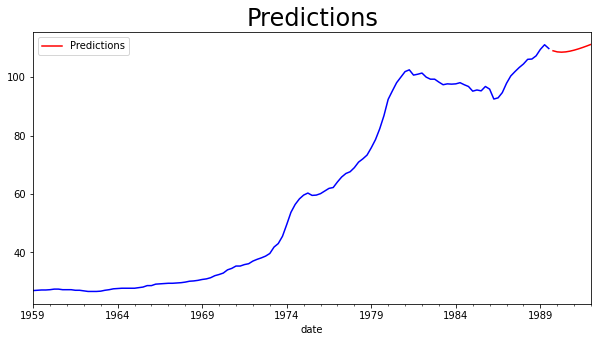

In [22]:
import matplotlib.pyplot as plt

df_forecast.plot(figsize = (10,5), color = "red")
dat.plot(color = "blue")
plt.title("Predictions", size = 24)
plt.show()